Solution: fval=-3.0, x1=1.0, x2=1.0, status=SUCCESS


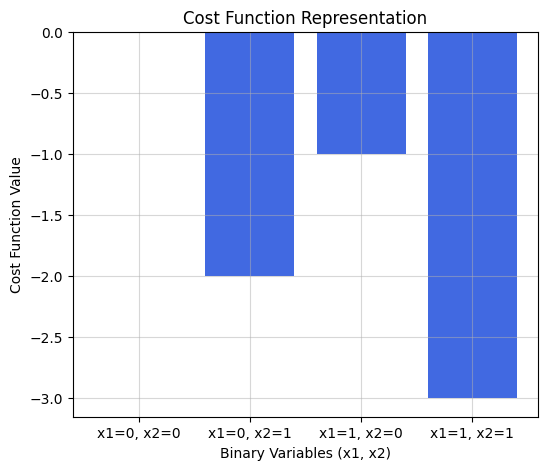


QAOA Quantum Circuit:


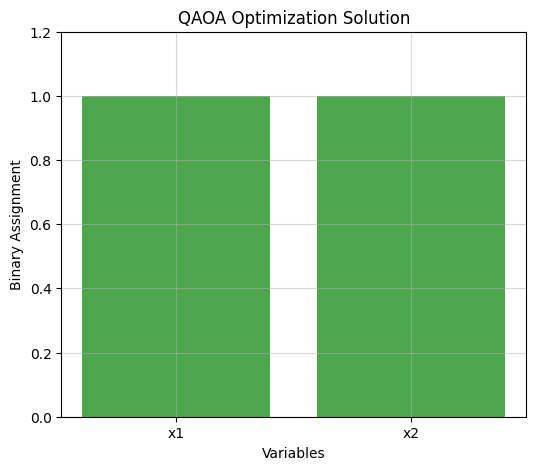

In [1]:
#-------------------------------------------------------------------------
# QAOA for Optimization with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import algorithm_globals
from qiskit.opflow import I, Z
from qiskit.visualization import circuit_drawer
import warnings
warnings.filterwarnings('ignore')

#-------------------------------------------------------------------------
# Visualizing the Cost Function
#-------------------------------------------------------------------------
def plot_cost_function():
    x1_vals = [0, 1]
    x2_vals = [0, 1]
    costs = {(x1, x2): -x1 - 2*x2 for x1 in x1_vals for x2 in x2_vals}
    
    plt.figure(figsize=(6, 5))
    plt.bar(range(len(costs)), costs.values(), tick_label=[f"x1={x1}, x2={x2}" for x1, x2 in costs.keys()], color="royalblue")
    plt.xlabel("Binary Variables (x1, x2)")
    plt.ylabel("Cost Function Value")
    plt.title("Cost Function Representation")
    plt.grid(alpha=0.5)
    plt.show()
    
#-------------------------------------------------------------------------
# Visualizing Quantum Circuit of QAOA
#-------------------------------------------------------------------------
def plot_qaoa_circuit(qaoa, operator):
    """Plot QAOA circuit with required parameters."""
    circuit = qaoa.construct_circuit(param_dict, operator)[0]  #  Extract the first circuit
    print("\nQAOA Quantum Circuit:")
    circuit_drawer(circuit, output='mpl', style={'backgroundcolor': 'white'})

#-------------------------------------------------------------------------
# Visualizing Optimization Results
#-------------------------------------------------------------------------
def plot_solution(result):
    x_vals = [int(k) for k in result.variables_dict.values()]
    labels = [f"x{i+1}" for i in range(len(x_vals))]
    
    plt.figure(figsize=(6, 5))
    plt.bar(labels, x_vals, color="green", alpha=0.7)
    plt.xlabel("Variables")
    plt.ylabel("Binary Assignment")
    plt.title("QAOA Optimization Solution")
    plt.ylim(0, 1.2)
    plt.grid(alpha=0.5)
    plt.show()
    
#-------------------------------------------------------------------------
# Define an optimization problem (Binary Quadratic Model)
#-------------------------------------------------------------------------
problem = QuadraticProgram()
problem.binary_var('x1')
problem.binary_var('x2')
problem.minimize(linear={'x1': -1, 'x2': -2})  # Minimize -x1 - 2*x2

#-------------------------------------------------------------------------
# Define QAOA parameters
#-------------------------------------------------------------------------
algorithm_globals.random_seed = 42  # Ensure reproducibility
quantum_instance = Aer.get_backend('aer_simulator')

qaoa = QAOA(optimizer=None, reps=2, quantum_instance=quantum_instance)
optimizer = MinimumEigenOptimizer(qaoa)

# Convert Quadratic Problem to Qiskit's Operator
operator, offset = problem.to_ising()

# Generate a sample set of QAOA parameters
initial_params = np.random.rand(2 * qaoa.ansatz.reps)  # Get reps from ansatz
param_dict = {p: v for p, v in zip(qaoa.ansatz.parameters, initial_params)}  # Convert to dictionary

# Solve the problem
result = optimizer.solve(problem)
print("Solution:", result)

#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_cost_function()
plot_qaoa_circuit(qaoa, operator)  # Pass required operator
plot_solution(result)
